In [1]:
#importing the libraries
import math
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
start="2010-01-01"
end="2019-12-31"
data_df = web.DataReader('AAPL','yahoo',start , end)
data_df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462008
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562590
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457409
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.500340
2010-01-11,7.607143,7.444643,7.600000,7.503929,462229600.0,6.442997
2010-01-12,7.491786,7.372143,7.471071,7.418571,594459600.0,6.369708
2010-01-13,7.533214,7.289286,7.423929,7.523214,605892000.0,6.459555


In [3]:
data_df=data_df.reset_index()
data_df.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462008
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562590
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457409
5,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.500340
6,2010-01-11,7.607143,7.444643,7.600000,7.503929,462229600.0,6.442997
7,2010-01-12,7.491786,7.372143,7.471071,7.418571,594459600.0,6.369708
8,2010-01-13,7.533214,7.289286,7.423929,7.523214,605892000.0,6.459555
9,2010-01-14,7.516429,7.465000,7.503929,7.479643,432894000.0,6.422144


#### The dataset has different variables, namely: High, Low, Open, Close, Volume and Adj Close. Also, we have the Date set as our index, which is highly significant in any timeseries problem.
- Variables Open and Close show the starting and final price at which the stock is traded on a particular day.
- Variables High, Low represent the maximum and minimum price of the stock for the day.
- Volume is the number of shares bought or sold in the day.
- While the Adj Close is the adjusted closing price of the stock. It alters the stock’s close price after accounting for any corporate actions. It’ll give us a better idea about the overall value of the stock and help make better decisions.

In [4]:
data_df=data_df.drop(['Date','Adj Close'], axis=1)

In [5]:
data_df.head(10)

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
5,7.571429,7.466429,7.510714,7.570714,447610800.0
6,7.607143,7.444643,7.600000,7.503929,462229600.0
7,7.491786,7.372143,7.471071,7.418571,594459600.0
8,7.533214,7.289286,7.423929,7.523214,605892000.0
9,7.516429,7.465000,7.503929,7.479643,432894000.0


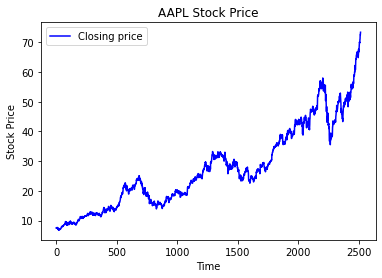

In [6]:
plt.plot(data_df['Close'],color = 'blue', label = 'Closing price')
plt.title('AAPL Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [7]:
data_df.shape

(2517, 5)

In [8]:
ma100=data_df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

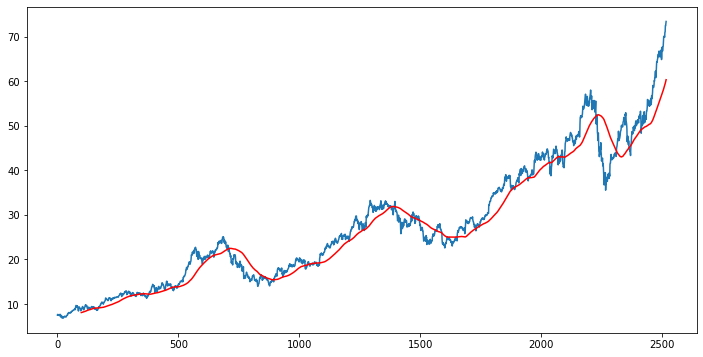

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data_df.Close)
plt.plot(ma100,'r')

In [10]:
ma200=data_df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

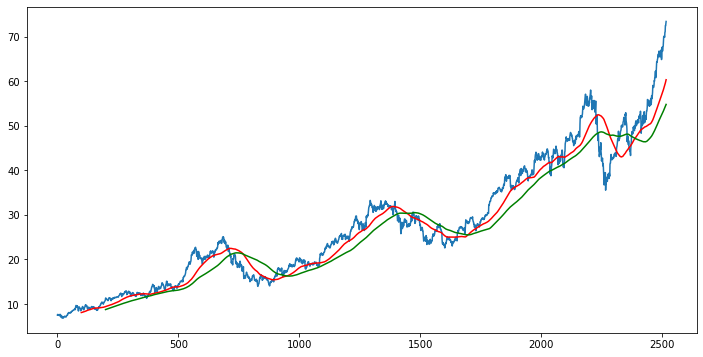

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data_df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
#split data into train and test

data_training=pd.DataFrame(data_df['Close'][0:int(len(data_df)*0.70)])
data_testing=pd.DataFrame(data_df['Close'][int(len(data_df)*0.70):int(len(data_df))])

print(data_training.shape)

(1761, 1)


In [13]:
print(data_testing.shape)

(756, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [16]:
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [18]:
data_training_array.shape

(1761, 1)

In [19]:
#Now we have to divide training data into x_train and y_train
x_train=[]
y_train=[]

for i in range(60,data_training_array.shape[0]):
    x_train.append(data_training_array[i-60:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
x_train

array([[[0.02527908],
        [0.02971782],
        [0.03021854],
        ...,
        [0.04682317],
        [0.05257461],
        [0.05459094]],

       [[0.02971782],
        [0.03021854],
        [0.02560389],
        ...,
        [0.05257461],
        [0.05459094],
        [0.05927326]],

       [[0.03021854],
        [0.02560389],
        [0.02507608],
        ...,
        [0.05459094],
        [0.05927326],
        [0.05812297]],

       ...,

       [[0.80277421],
        [0.81101566],
        [0.80599496],
        ...,
        [0.84795991],
        [0.84900194],
        [0.84170783]],

       [[0.81101566],
        [0.80599496],
        [0.81054198],
        ...,
        [0.84900194],
        [0.84170783],
        [0.84388656]],

       [[0.80599496],
        [0.81054198],
        [0.81101566],
        ...,
        [0.84170783],
        [0.84388656],
        [0.85089656]]])

In [21]:
x_train.shape

(1701, 60, 1)

In [22]:
#Model Building

In [23]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [24]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
54/54 [==============================] - 14s 152ms/step - loss: 0.0650
Epoch 2/50
54/54 [==============================] - 7s 137ms/step - loss: 0.0163
Epoch 3/50
54/54 [==============================] - 8s 139ms/step - loss: 0.0113
Epoch 4/50
54/54 [==============================] - 7s 134ms/step - loss: 0.0109
Epoch 5/50
54/54 [==============================] - 7s 135ms/step - loss: 0.0103
Epoch 6/50
54/54 [==============================] - 7s 135ms/step - loss: 0.0091
Epoch 7/50
54/54 [==============================] - 7s 133ms/step - loss: 0.0081
Epoch 8/50
54/54 [==============================] - 8s 154ms/step - loss: 0.0081
Epoch 9/50
54/54 [==============================] - 7s 137ms/step - loss: 0.0083
Epoch 10/50
54/54 [==============================] - 7s 138ms/step - loss: 0.0084
Epoch 11/50
54/54 [==============================] - 7s 134ms/step - loss: 0.0073
Epoch 12/50
54/54 [==============================] - 7s 137ms/step - loss: 0.0071
Epoch 13/50
54/54 [=====

In [27]:
model.save('keras_model.h5')

In [28]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [29]:
past_100_days=data_training.tail(60)

In [30]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [31]:
final_df.head()

,Close
0,28.250000
1,28.262501
2,28.472500
3,28.514999
4,29.012501


In [32]:
input_data=scaler.fit_transform(final_df)

In [33]:
input_data

array([[0.03878898],
       [0.03905504],
       [0.04352453],
       [0.04442907],
       [0.05501758],
       [0.05634779],
       [0.06188144],
       [0.05996597],
       [0.06342449],
       [0.06299885],
       [0.06257317],
       [0.06071089],
       [0.06039161],
       [0.05794402],
       [0.06353093],
       [0.06672343],
       [0.05256996],
       [0.04666385],
       [0.04262   ],
       [0.04166224],
       [0.03075449],
       [0.03128657],
       [0.02192191],
       [0.01665424],
       [0.02500801],
       [0.02846652],
       [0.02750877],
       [0.01106737],
       [0.01447271],
       [0.        ],
       [0.00744919],
       [0.02277322],
       [0.02256038],
       [0.02314568],
       [0.03203152],
       [0.03240398],
       [0.0293711 ],
       [0.03235076],
       [0.03118017],
       [0.03059487],
       [0.02559326],
       [0.0201128 ],
       [0.02229436],
       [0.01809089],
       [0.02256038],
       [0.02830691],
       [0.03410665],
       [0.043

In [34]:
input_data.shape

(816, 1)

In [35]:
x_test=[]
y_test=[]

for i in range(60,input_data.shape[0]):
    x_test.append(input_data[i-60:i])
    y_test.append(input_data[i,0])


In [36]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [37]:
print(x_test.shape)

(756, 60, 1)


In [38]:
print(y_test.shape)

(756,)


In [39]:
#Making Predictions

y_prediction=model.predict(x_test)

In [40]:
y_test

array([0.05863576, 0.05379377, 0.05554966, 0.05485792, 0.05799724,
       0.06491436, 0.07066084, 0.07129936, 0.0747047 , 0.07204428,
       0.0709269 , 0.07603491, 0.07598169, 0.07486432, 0.07603491,
       0.07646059, 0.07587529, 0.08603809, 0.08635737, 0.08641055,
       0.08470788, 0.08321805, 0.12259232, 0.12142173, 0.12434821,
       0.13078639, 0.13738427, 0.14009788, 0.14211982, 0.14052355,
       0.14674894, 0.15595406, 0.15856122, 0.15770995, 0.15967864,
       0.16489304, 0.16707461, 0.16398851, 0.16468025, 0.16611682,
       0.16643614, 0.18133444, 0.17691821, 0.18128126, 0.17894008,
       0.17989787, 0.17713101, 0.1754283 , 0.17787592, 0.17819516,
       0.17707783, 0.18489948, 0.18612325, 0.18239868, 0.19022033,
       0.1816005 , 0.19000745, 0.18734703, 0.1858572 , 0.18713423,
       0.20267109, 0.20437372, 0.20336275, 0.20192618, 0.20213897,
       0.20783232, 0.20384168, 0.20192618, 0.20022347, 0.19931893,
       0.19112486, 0.1920294 , 0.18803876, 0.19218902, 0.18883

In [41]:
y_prediction

array([[0.12816572],
       [0.12908685],
       [0.12989596],
       [0.13056654],
       [0.13108546],
       [0.13145792],
       [0.13171797],
       [0.13191995],
       [0.13211656],
       [0.13235497],
       [0.13266182],
       [0.13304007],
       [0.13349435],
       [0.13402373],
       [0.13461477],
       [0.13523914],
       [0.13588217],
       [0.13652778],
       [0.13718276],
       [0.13786104],
       [0.13856995],
       [0.13930447],
       [0.1400474 ],
       [0.14088023],
       [0.14189552],
       [0.14316297],
       [0.14473821],
       [0.14666234],
       [0.14895308],
       [0.15160096],
       [0.15456453],
       [0.15774536],
       [0.16111526],
       [0.1646614 ],
       [0.16834012],
       [0.17206605],
       [0.17583016],
       [0.17961925],
       [0.18338656],
       [0.18707368],
       [0.19066209],
       [0.19412753],
       [0.19747397],
       [0.20069478],
       [0.20378818],
       [0.20674118],
       [0.20953798],
       [0.212

In [42]:
scaler.scale_

array([0.02128339])

In [43]:
scale_factor=1/0.00626135
y_prediction=y_prediction*scale_factor
y_test=y_test*scale_factor

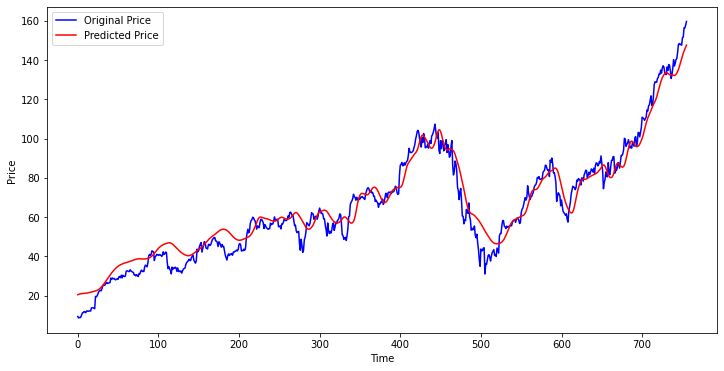

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original Price")
plt.plot(y_prediction,'r',label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Sentiment Analysis 

## Gathering dataset

In [46]:
!pip install nltk

In [47]:
df_sentiment = pd.read_csv("india-news-headlines.csv")

In [48]:
df_sentiment.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


## Importing necessary modules

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Adarsh\AppData\Roaming\nltk_data...


True

## Predicting if a news headline is positive , negative or neutral

In [ ]:
vader = SentimentIntensityAnalyzer()

sentiment = df_sentiment['headline_text'].apply(vader.polarity_scores).tolist()
sentiment_score = pd.DataFrame(sentiment)

df_sentiment = df_sentiment.join(sentiment_score, rsuffix='_right')


df_sentiment.head()